In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"hotel.csv")
df.head()

,hardware_id,created_at,Wh,voltage ry,voltage yb,voltage br,Voltage R,Voltage Y,Voltage B,Current R,Current Y,Current B
0,abcdefgh,2019-06-27T23:16:00.000Z,72350.99986,0,406,404,233,236,233,17.125,16.500,18.750
1,abcdefgh,2019-06-27T23:15:00.000Z,72328.45597,0,406,404,233,237,234,17.000,16.500,18.750
2,abcdefgh,2019-06-27T23:13:00.000Z,72306.34808,0,408,404,234,236,234,17.000,16.875,18.750
3,abcdefgh,2019-06-27T23:11:00.000Z,72284.64116,0,406,404,233,236,234,17.125,16.625,18.750
4,abcdefgh,2019-06-27T23:09:00.000Z,72263.26715,0,406,402,232,235,233,17.000,16.750,18.375


In [3]:
df.columns

Index(['hardware_id', 'created_at', 'Wh', 'voltage ry', 'voltage yb',
       'voltage br', 'Voltage R', 'Voltage Y', 'Voltage B', 'Current R',
       'Current Y', 'Current B'],
      dtype='object')

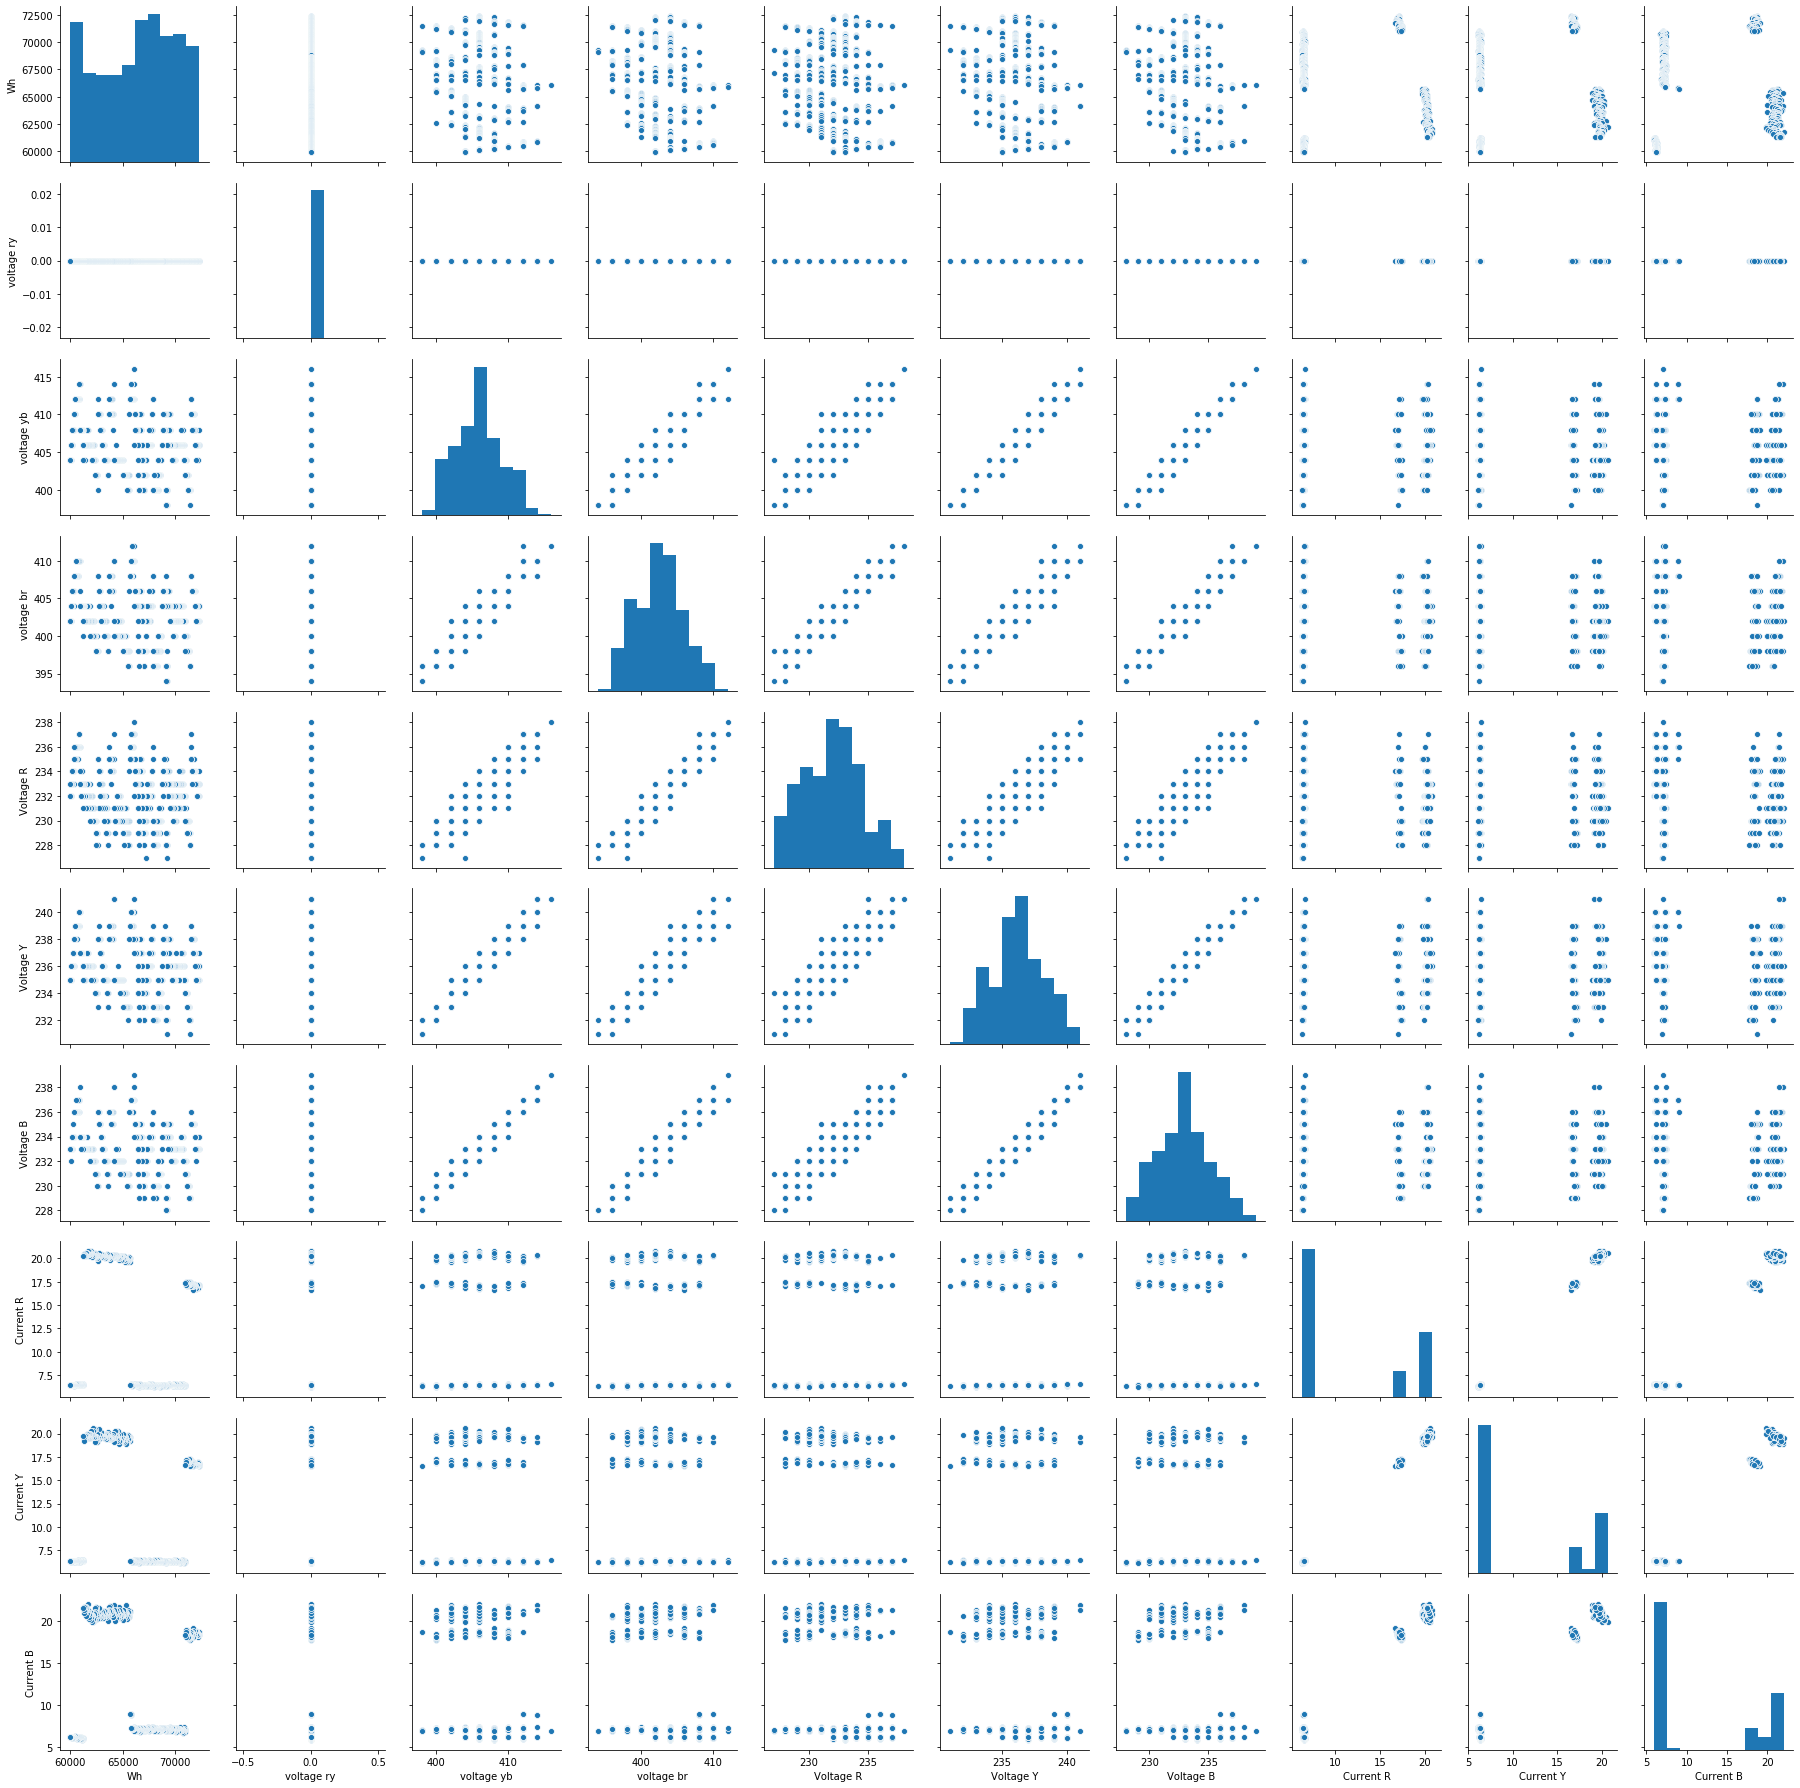

In [4]:
sns.pairplot(df)

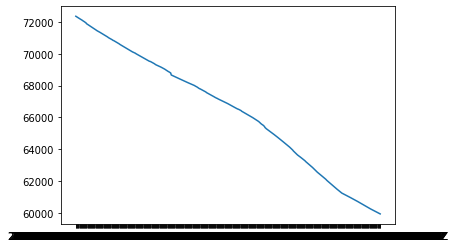

In [7]:
plt.plot(df['created_at'],df['Wh'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


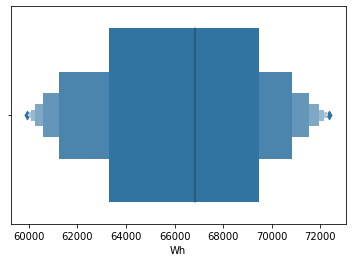

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


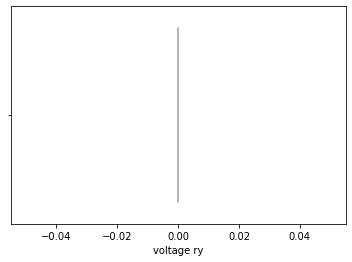

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


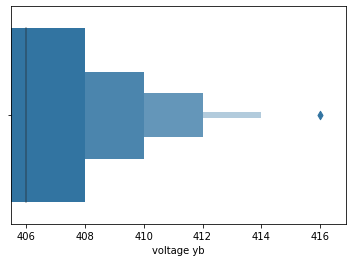

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


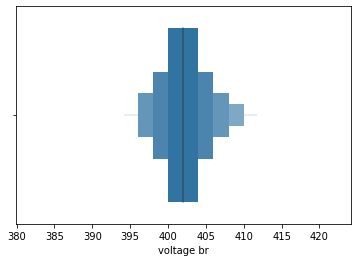

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


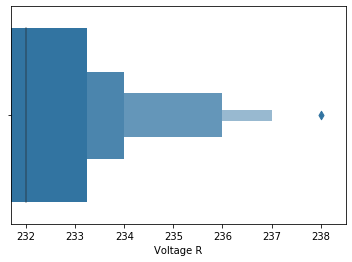

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


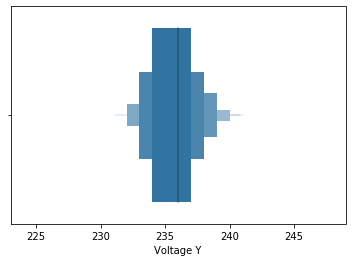

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


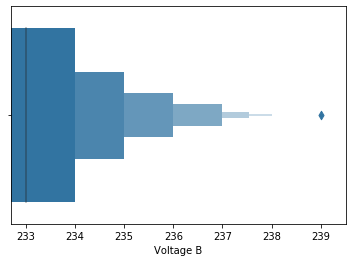

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


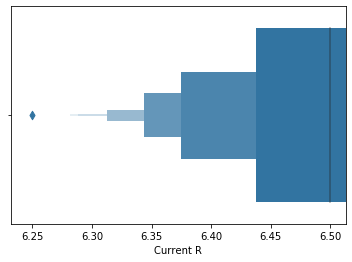

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


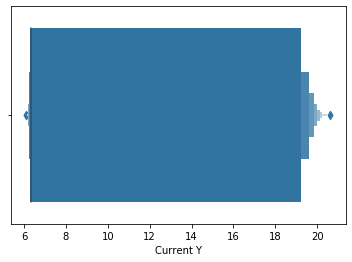

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


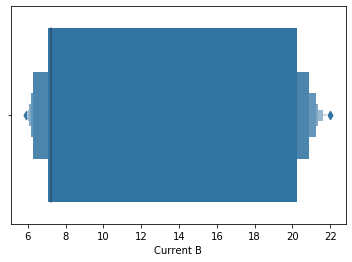

In [8]:
for i in ['Wh','voltage ry','voltage yb','voltage br','Voltage R','Voltage Y','Voltage B','Current R','Current Y','Current B']:
    sns.boxenplot(df[i])
    plt.show()

In [9]:
from sklearn.preprocessing import scale as s

In [13]:
DF = df.drop(['created_at','voltage ry','hardware_id'],axis=1)
DF = DF.values

In [14]:
DF = s(DF)

In [15]:
Y,X = DF[:,0],DF[:,:8]

In [16]:
from sklearn.model_selection import train_test_split as t
train_x,test_x,train_y,test_y = t(X,Y,test_size=0.2)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [18]:
def create_polynomial_regression_model(degree):  
  poly_features = PolynomialFeatures(degree=degree)
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(train_x)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, train_y)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(test_x))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(train_y, y_train_predicted))
  r2_train = r2_score(train_y, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(test_y, y_test_predict))
  r2_test = r2_score(test_y, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [19]:
create_polynomial_regression_model(8)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.820652531672418e-12
R2 score of training set is 1.0


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.3825683478315142
R2 score of test set is 0.8661914159044329


In [20]:
rfr = RandomForestRegressor(max_depth=2)
rfr.fit(train_x,train_y)
y_train_predicted = rfr.predict(train_x)
y_test_predict = rfr.predict(test_x)
 # evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(train_y, y_train_predicted))
r2_train = r2_score(train_y, y_train_predicted)
  
  # evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(test_y, y_test_predict))
r2_test = r2_score(test_y, y_test_predict)

c:\users\saatwik bisaria\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
print('-'*15+'Training Session'+'-'*15)
print(f'MSE = {mean_squared_error(train_y,y_train_predicted)}')
print(f'RMSE = {rmse_train}')
print(f'R2-Score = {r2_train}')

---------------Training Session---------------
MSE = 0.04585679128125614
RMSE = 0.2141419885992846
R2-Score = 0.9530165232174249


In [22]:
print('-'*15+'Testing Session'+'-'*15)
print(f'MSE = {mean_squared_error(test_y,y_test_predict)}')
print(f'RMSE = {rmse_test}')
print(f'R2-Score = {r2_test}')

---------------Testing Session---------------
MSE = 0.04874651725640735
RMSE = 0.22078613465615848
R2-Score = 0.9554334006086257
